# Desafío 3 - Grupo 7

## Integrantes:

- Bobbio, Paula
- Sammartino, Virginia
- Cocio, Alex Federico
- Onno, Olivier (?

## Lectura del dataset

In [3]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv('../Data/Aprender2018-primaria-6.csv', sep=';')

C:\Users\alexc\anaconda3\envs\dhdsblend\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (113) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The reason you get this low_memory warning is because guessing dtypes for each column is very memory demanding. Pandas tries to determine what dtype to set by analyzing the data in each column. 

Fuente: https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options

In [5]:
data.sample(5)

,ap1,ap2,ap3a,ap3b,ap3c,ap4,ap5a,ap5b,ap5c,ap5d,...,ponder,lpondera,ldesemp,lpuntaje,mpondera,mdesemp,mpuntaje,isocioa,isocioal,isocioam
87871,3,1,1,1,1,7,1,2,2,1,...,"1,311703","1,2546352",2,"391,93985","1,2561769",1,"338,99377",2,2,2
284241,2,2,1,1,1,2,1,2,2,1,...,"1,1138428","1,1097989",2,"444,28094","1,1965024",2,"447,62308",2,2,2
187702,3,2,1,1,1,1,1,-9,-9,1,...,"1,1620034","2,0803599",2,"414,67865","1,3135577",1,"351,13974",-1,-1,-1
113478,2,2,1,1,1,3,1,1,2,1,...,"1,1718484","1,2224609",1,"381,49921","1,1738386",1,"385,48364",3,3,3
437099,3,1,8,1,9,3,1,1,2,1,...,"1,0780349","1,10984",4,"631,60492","1,1095033",4,"614,79987",2,2,2


## Feature Selection

Descartamos manualmente las variables que consideramos redundantes para el problema. Estas son:
- Indice del Contexto Social de la Educación
- Factor de expansión (solo para variable cuestionario complementario)
- Factor de expansión prueba de Lengua
- Puntaje en Lengua
- Factor de expansión prueba de Matemática
- Puntaje en Matemática
- Indice socioeconómico del alumno
- Indice socioeconómico del alumno ponderador Lengua
- Indice socioeconómico del alumno ponderador Matemática

- Desempeño en Lengua

**¿Deberíamos explicar por qué?**

In [6]:
columns_to_drop = ['ICSE','ponder','lpondera','lpuntaje','mpondera','mpuntaje','isocioa','isocioal','isocioam', 'ldesemp']
data1 = data.drop(columns_to_drop, axis=1)
print('Eliminamos', data.shape[1]-data1.shape[1], 'columnas.')

Eliminamos 10 columnas.


# Analizamos algunas características del dataset

In [7]:
# ¿Cuántas observaciones hay en la tabla?
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579510 entries, 0 to 579509
Columns: 114 entries, ap1 to mdesemp
dtypes: int64(113), object(1)
memory usage: 504.0+ MB


In [8]:
# Dimensión del dataframe
print('El dataset tiene', data1.shape[0], 'filas y', data1.shape[1], 'columnas.') 

El dataset tiene 579510 filas y 114 columnas.


In [9]:
# ¿Qué tipo de datos tiene?
data1.dtypes.value_counts()

int64     113
object      1
dtype: int64

In [10]:
# ¿Hay datos faltantes?
print('Datos faltantes:', data1.isnull().any(axis=1).sum())

Datos faltantes: 0


In [11]:
# ¿Están balanceados los datos de la variable target?
data1.mdesemp.value_counts(normalize=True, ascending=False).round(2)

3    0.37
2    0.21
4    0.20
1    0.18
     0.05
Name: mdesemp, dtype: float64

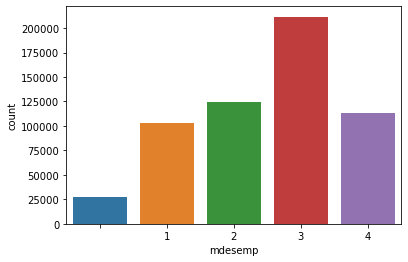

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(data1.mdesemp.sort_values(), label="Count")
plt.show()

## Algunas consideraciones

1) Elimino las filas que no especifica ningún valor en la columna target

In [13]:
empty_mask = data1.mdesemp == ' '
data1.loc[empty_mask,:]

,ap1,ap2,ap3a,ap3b,ap3c,ap4,ap5a,ap5b,ap5c,ap5d,...,ap39,ap40,ap41a,ap41b,ap41c,ap42,cod_provincia,sector,ambito,mdesemp
11,3,1,1,1,1,3,2,2,-9,-9,...,-1,-1,1,1,-9,-1,6,1,1,
45,2,1,1,1,1,7,1,2,2,2,...,-1,-1,2,2,-9,-1,6,1,1,
61,2,1,1,2,2,4,1,1,-9,1,...,-1,-1,2,2,1,-1,6,1,1,
62,3,1,1,1,1,4,1,1,2,1,...,-1,-1,2,3,1,-1,6,1,1,
63,2,1,1,1,1,6,1,2,2,1,...,-1,-1,-9,-9,-9,-1,6,1,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579431,2,2,1,1,1,3,1,1,2,1,...,-1,-1,2,3,1,-1,94,1,1,
579432,2,2,1,1,1,3,1,2,2,2,...,-1,-1,2,4,2,-1,94,1,1,
579483,3,2,1,1,1,5,1,1,2,2,...,-1,-1,1,-9,-6,-1,94,1,1,
579493,2,2,8,8,8,4,1,1,-9,-9,...,-1,-1,-9,-9,-9,-1,94,1,1,


In [14]:
indexNames = data1[empty_mask].index
data2 = data1.drop(indexNames)

3    0.38
2    0.23
4    0.21
1    0.19
Name: mdesemp, dtype: float64


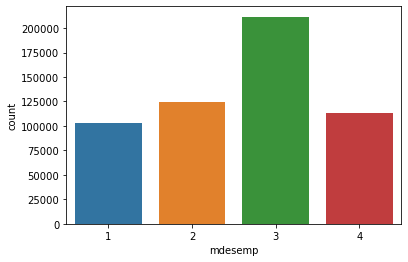

In [15]:
print(data2.mdesemp.value_counts(normalize=True, ascending=False).round(2))

sns.countplot(data2.mdesemp.sort_values(), label="Count")
plt.show()

**Podría mejorar el gráfico (agregando labels adentro de la figura que indiquen las proporciones de cada barra)**

2) Creamos una muestra para agilizar el tiempo computacional

In [16]:
data2_sample = data2.sample(frac=0.01, random_state=2)
print('Vamos a trabajar con una muestra del', round(data2_sample.shape[0]/data2.shape[0],2)*100,'% del dataset.')

Vamos a trabajar con una muestra del 1.0 % del dataset.


In [17]:
data2_sample.shape

(5520, 114)

3    0.39
2    0.22
4    0.20
1    0.19
Name: mdesemp, dtype: float64


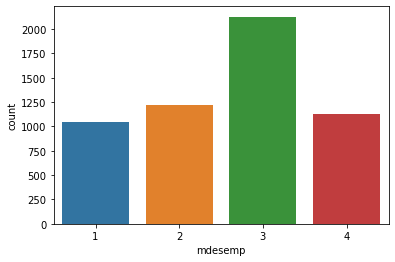

In [18]:
print(data2_sample.mdesemp.value_counts(normalize=True, ascending=False).round(2))

sns.countplot(data2_sample.mdesemp.sort_values(), label="Count")
plt.show()

Renombramos algunas columnas para facilitar la interpretación del dataset

In [19]:
data2_sample = data2_sample.rename(columns={'ap1': 'edad', 'ap2':'sexo', 'ap4':'personasconv', 'ap7a':'internet' ,
                            'ap7b':'agua', 'ap7c':'compu', 'ap9':'educmam', 'ap14':'trabajofam', 'ap15':'trabajofuera',
                            'ap16':'jardin' , 'ap17':'repetidor', 'ap22':'opmat'})

## Pipeline

In [20]:
# from sklearn.datasets import load_iris
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.model_selection import StratifiedKFold

# import warnings
# warnings.filterwarnings('ignore')

In [21]:
from sklearn.model_selection import train_test_split

Armamos la matriz de predictores ($X$) (vamos a seleccionar sólo algunas columnas) y el target ($y$) (que es el nivel de desempeño en Matemática)

In [22]:
cols=['edad', 'sexo', 'personasconv', 'internet', 'agua', 'compu', 'educmam', 'trabajofam', 'trabajofuera', 'jardin', 'repetidor', 'opmat']
X = data2_sample[cols]
y = data2_sample['mdesemp']

Vamos a separar nuestros datos en aquellos que vamos a usar para el entrenamiento y los que servirán para testear el modelo.

In [23]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=30, stratify=y)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3864, 12)

(1656, 12)

(3864,)

(1656,)

Probamos combinar nuestro pipeline con la búsqueda de hiperparámetros del modelo *K-NN*, *Regresión Logística* y *Naive-Bayes* de clasificación.

Importamos las librerías que vamos a utilizar

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

### Preprocesamiento de datos

¿Hace falta estandarizar en este caso? Los features están en las mismas unidades pero las escalas podrían ser distintas

The type of encoding used here is called "label encoding" - and it is very simple: we just assign an ID for a categorical value.

Our computer now knows how to represent these categories, because it knows how to work with numbers. However, this method of encoding is not very effective, because it tends to naturally give the higher numbers higher weights.

It wouldn't make sense to say that our category of "Argentina" is greater or smaller than "Paraguay", or that adding the category "Lemon" to "Peach" would give us a category "Orange", since these values are not ordinal.

If we represented these categories in one-hot encoding, we would actually replace the rows with columns. We do this by creating one boolean column for each of our given categories, where only one of these columns could take on the value 1 for each sample.

In [46]:
def estandarizar_feature():
    onehot_encoder = OneHotEncoder(drop='first')
    # fiteo y transformo la columna "nombre_de_feature"
    dummy_oneHot_correct = onehot_encoder.fit_transform(data2_sample[cols])
    # pongo un vector en un dataset.
    dummy_oneHot_correct = pd.DataFrame(dummy_oneHot_correct.toarray())

    return

Como la codificación **"One-Hot-Enconding" induce una multicolinealidad perfecta**, eliminamos una de las columnas de las características codificadas

Utilizaremos la variables "mdesemp" para generar una variable derivada que tenga en cuenta que es mejor si el desempeño es "satsifactorio". Con esto podemos generar por ejemplo una variable categórica que puede ser utilizada como vector "objetivo" en un problema de clasificación.

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(data2_sample['mdesemp'])

### Pipeline + Gridsearch

Generamos la lista de pasos que le vamos a pasar al `pipeline`. Estos pasos son una lista de tuplas que consisten en el **nombre** y un **transformador** o un **estimador**

#### K-NN

Vamos a trabajar en primer lugar con el modelo K-NN

In [101]:
pasos_knn = [('onehot_encoder', estandarizar_feature()), ('knn',KNeighborsClassifier())]

In [113]:
# CHEQUEAR -> No sé si reconoce el transformador estandarizar_feature()

Instanciamos `pipeline` con los pasos que definimos en el punto anterior:

In [102]:
pipe_grid_knn = Pipeline(pasos_knn)

In [114]:
pipe_grid_knn.steps[0]

('onehot_encoder', None)

In [116]:
# Acá arriba hay un error (no debería dar NONE) 

In [115]:
pipe_grid_knn.steps[1]

('knn', KNeighborsClassifier())

Ahora, importamos GridSearchCV y una clase para definir los kfold del esquema de validación

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

folds_knn = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

Generamos la grilla de hiperparámetros para explorar cuáles son los mejores para knn. La particularidad de esta grilla de parámetros es que su sintaxis es diferente a cuando la hacemos para usar sólo con GridSearchCV.

En esta ocasión que la estamos combinando con un pipeline tenemos que indicar, de alguna manera, a cuál de las estapas del proceso corresponde los hiperparámetros que queremos evaluar.

In [104]:
param_grid_knn = {'knn__n_neighbors':range(1,31),'knn__weights':['uniform','distance']}

Definida la grilla de hiperparámetros, instanciamos el GridSearchCV usando pipe (donde tenemos instanciado nuestro pipeline) y la grilla definida; y luego entrenamos el modelo:

In [105]:
grid_knn = GridSearchCV(pipe_grid_knn, param_grid_knn, cv=folds_knn)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('onehot_encoder', None),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 31),
                         'knn__weights': ['uniform', 'distance']})

¿Qué sucedió acá?: Cuando utilizamos el método .fit de pipe sobre los datos de train, primero se ejecutó para estos datos el escalador, siendo que internamente el escalador aplicó el .fit para aprender la media y desvío de la variable, y luego .transform para que lo que aprendió se aplique a los datos y los pase de escala (ACORDEMONOS QUE USAMOS ONE HOT ENCODER). Luego, los datos re-escalados fueron entrenados (.fit) con el KNeighborsClassifier.

Es decir, que ahora el objeto pipe va a contar con métodos para que evaluemos nuestro modelo (.predict, y .score).

**CHEQUEAR!!!**

Veamos cómo le fue al mejor modelo:

In [106]:
grid_knn.best_score_

0.3938936516767321

Veamos cuál es la mejor configuración

In [107]:
grid_knn.best_estimator_

Pipeline(steps=[('onehot_encoder', None),
                ('knn', KNeighborsClassifier(n_neighbors=21))])

Ahora utilizamos el método predict del moejor modelo KNN

In [118]:
from sklearn.metrics import accuracy_score

In [119]:
accuracy_score(grid_knn.best_estimator_.predict(X_test),y_test)

0.3804347826086957

#### Logistic Regression

In [138]:
pasos_lr = [('onehot_encoder', OneHotEncoder(drop='first')), ('lr',LogisticRegression())]

In [139]:
pipe_grid_lr = Pipeline(pasos_lr)

In [140]:
pipe_grid_lr.steps[0]

('onehot_encoder', OneHotEncoder(drop='first'))

In [141]:
# AUNQUE NO HAYA SALIDO NONE, TAMBIEN ESTA MAL

In [142]:
pipe_grid_lr.steps[1]

('lr', LogisticRegression())

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

folds_lr = StratifiedKFold(n_splits=5, shuffle=True, random_state=44)

In [149]:
param_grid_lr = {'C': [1, 10, 100, 1000],
     'penalty': ['l1', 'l2',],
     'solver': ['saga']}

In [150]:
grid_lr = GridSearchCV(pipe_grid_lr, param_grid_lr, cv=folds_lr)
grid_lr.fit(X_train, y_train)

ValueError: Invalid parameter C for estimator Pipeline(steps=[('onehot_encoder', OneHotEncoder(drop='first')),
                ('lr', LogisticRegression())]). Check the list of available parameters with `estimator.get_params().keys()`.

In [129]:
grid_lr.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [151]:
grid_lr.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [152]:
accuracy_score(grid_lr.best_estimator_.predict(X_test),y_test)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

#### Naive-Bayes (No tiene hiper-parámetros, por lo que habría que probarlo antes de hacer gridsearch y usarlo como benchmark)

In [158]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [159]:
round(accuracy_score(y_test, y_pred), 2)

0.26